# OSEMN Exercises

In [195]:
%matplotlib inline
import pandas as pd
import numpy as np

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [196]:
with open("./data/simple_data.txt", 'w') as file:
    # noinspection PyTypeChecker
    np.savetxt(file, np.random.randn(10))

2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [197]:
with open("./data/data.txt", "w") as file:
    # noinspection PyTypeChecker
    np.savetxt(file, np.random.randn(5, 5))

3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [198]:
import os


file_csv = open("./data/data.csv", "w")
with open("./data/data.txt", "r") as file:
    for line in file:
        file_csv.write(line.replace(" ", ","))
os.remove("./data/data.txt")
file_csv.close()

4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [199]:
def bin_word_to_chr(bin_word):
    num = 0
    for c in bin_word:
        num = num * 2 + int(c)
    return chr(num)


file_cards = open("./data/credit_card.dat", "r")
with open("./data/credit_card.txt", "w") as file:
    for line in file_cards:
        for i in range(0, len(line) - 10, 6):
            six_bit_word = line[i : i + 6]
            file.write(bin_word_to_chr(six_bit_word))
        file.write("\n")
file_cards.close()

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express".
Then save the data to a CSV.

In [200]:
df = pd.read_json(r"./data/user_data.json")
df[df["CreditCardType"] == "American Express"].to_csv("././data/user_data.csv")

6\. Load the file from this url:
[https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1)
with Pandas.
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe wath yuou see

In [201]:
import io
import requests
import matplotlib.pyplot as plt
plt.style.use("dark_background")

url ='https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1'
s = requests.get(url).content
df_mushroom = pd.read_csv(io.StringIO(s.decode('utf-8')))
df_mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


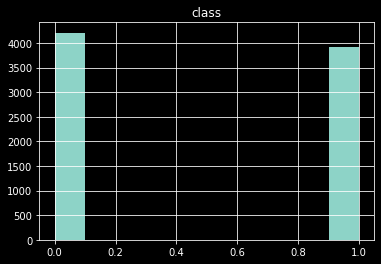

In [202]:
df_mushroom.hist(column="class")
plt.show()

We see that class is a binary label $\{0, 1\}$, with average close to $0.5$, so it could define whether a mushroom is in
the analyzed class or not.

7\. Load the remote file
[https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1)
with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

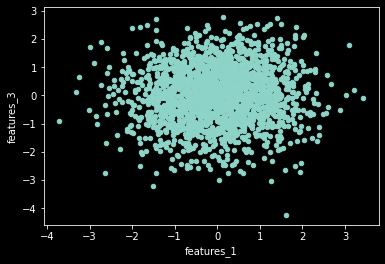

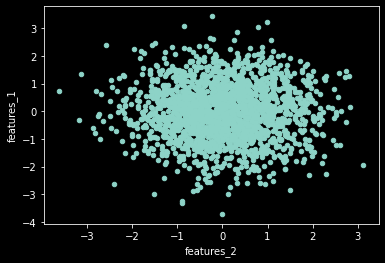

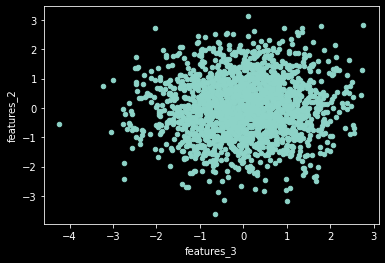

In [203]:
url ='https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1'
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))
for x,y in zip(("features_1", "features_2", "features_3"),
               ("features_3", "features_1", "features_2")):
    df.plot.scatter(x, y)

8\. Load the same file of point 6, and convert the file to json with Pandas.

In [204]:
df_mushroom.to_json("./data/mushroom_categorized.json", orient="index")
